In [3]:
#importing Required Libraries
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

**Spatial data**, also known as geospatial data, GIS data, or geodata, is a type of numeric data that defines the geographic location of a physical object, such as a building, a street, a town, a city, a country, or other physical objects, using a geographic coordinate system. You may determine not just the position of an object, but also its length, size, area, and shape using spatial data.

In [4]:
#Import Country boundary shapefile
India_data = gpd.read_file('../input/geospatial-data-projections-dataset/India_Districts.shp')

In [5]:
#it prints the first 5 rows
India_data.head()

,Dist_Name,State_Name,geometry
0,Dadra & Nagar Haveli,DADRA & NAGAR HAVE,"MULTIPOLYGON (((73.09712 20.36015, 73.09771 20..."
1,Daman,DAMAN & DIU,"POLYGON ((72.82124 20.36766, 72.82161 20.36979..."
2,Diu,DAMAN & DIU,"MULTIPOLYGON (((70.92774 20.73675, 70.92842 20..."
3,North & Middle Andaman,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.90111 12.91088, 92.90145 12..."
4,South Andaman,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.69603 12.23911, 92.69642 12..."


<AxesSubplot:>

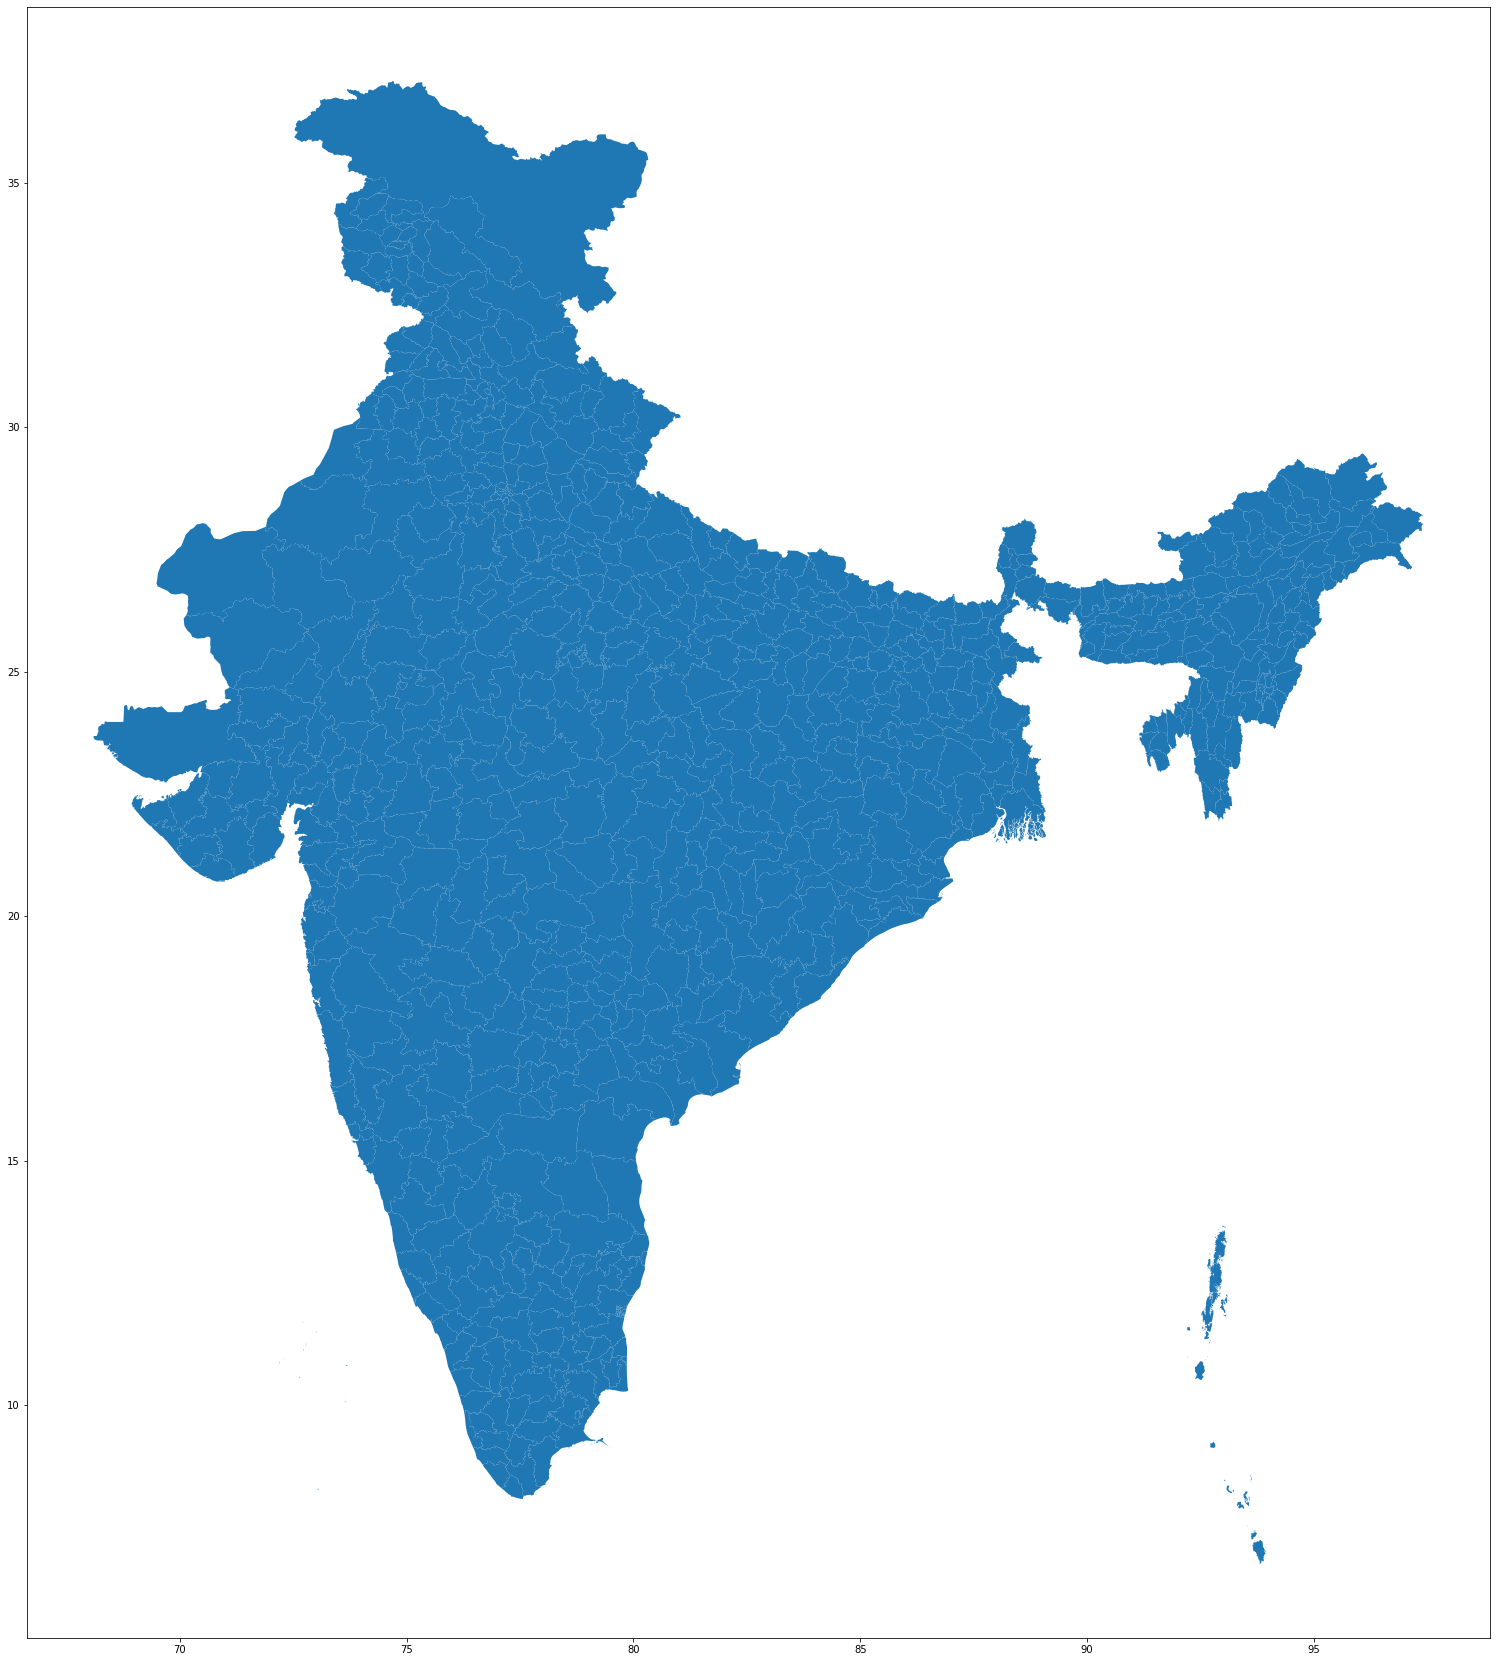

In [6]:
#plot map from direct data
India_data.plot(figsize = (30,30))

In [7]:
#data for selected columns
New_data = India_data[['State_Name', 'geometry']]
New_data

,State_Name,geometry
0,DADRA & NAGAR HAVE,"MULTIPOLYGON (((73.09712 20.36015, 73.09771 20..."
1,DAMAN & DIU,"POLYGON ((72.82124 20.36766, 72.82161 20.36979..."
2,DAMAN & DIU,"MULTIPOLYGON (((70.92774 20.73675, 70.92842 20..."
3,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.90111 12.91088, 92.90145 12..."
4,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.69603 12.23911, 92.69642 12..."
...,...,...
727,TAMIL NADU,"POLYGON ((79.22881 13.15697, 79.23023 13.15460..."
728,TAMIL NADU,"POLYGON ((79.65398 13.21057, 79.65695 13.21040..."
729,TAMIL NADU,"POLYGON ((78.91088 12.89248, 78.90997 12.89176..."
730,TAMIL NADU,"POLYGON ((79.99080 13.05383, 79.99156 13.05343..."


**Calculating Area**

We can calculate the area of each country using geopandas by creating a new column “area” and using the area property

In [8]:
# Calculating the area of each State
New_data['area'] = India_data.area

In [9]:
#get data with calculated area
New_data

,State_Name,geometry,area
0,DADRA & NAGAR HAVE,"MULTIPOLYGON (((73.09712 20.36015, 73.09771 20...",0.042842
1,DAMAN & DIU,"POLYGON ((72.82124 20.36766, 72.82161 20.36979...",0.005046
2,DAMAN & DIU,"MULTIPOLYGON (((70.92774 20.73675, 70.92842 20...",0.002905
3,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.90111 12.91088, 92.90145 12...",0.274286
4,ANDAMAN & NICOBAR,"MULTIPOLYGON (((92.69603 12.23911, 92.69642 12...",0.193978
...,...,...,...
727,TAMIL NADU,"POLYGON ((79.22881 13.15697, 79.23023 13.15460...",0.184491
728,TAMIL NADU,"POLYGON ((79.65398 13.21057, 79.65695 13.21040...",0.156136
729,TAMIL NADU,"POLYGON ((78.91088 12.89248, 78.90997 12.89176...",0.165055
730,TAMIL NADU,"POLYGON ((79.99080 13.05383, 79.99156 13.05343...",0.136663


In [10]:
#it prints the information about our data
New_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   State_Name  732 non-null    object  
 1   geometry    732 non-null    geometry
 2   area        732 non-null    float64 
dtypes: float64(1), geometry(1), object(1)
memory usage: 17.3+ KB


<AxesSubplot:>

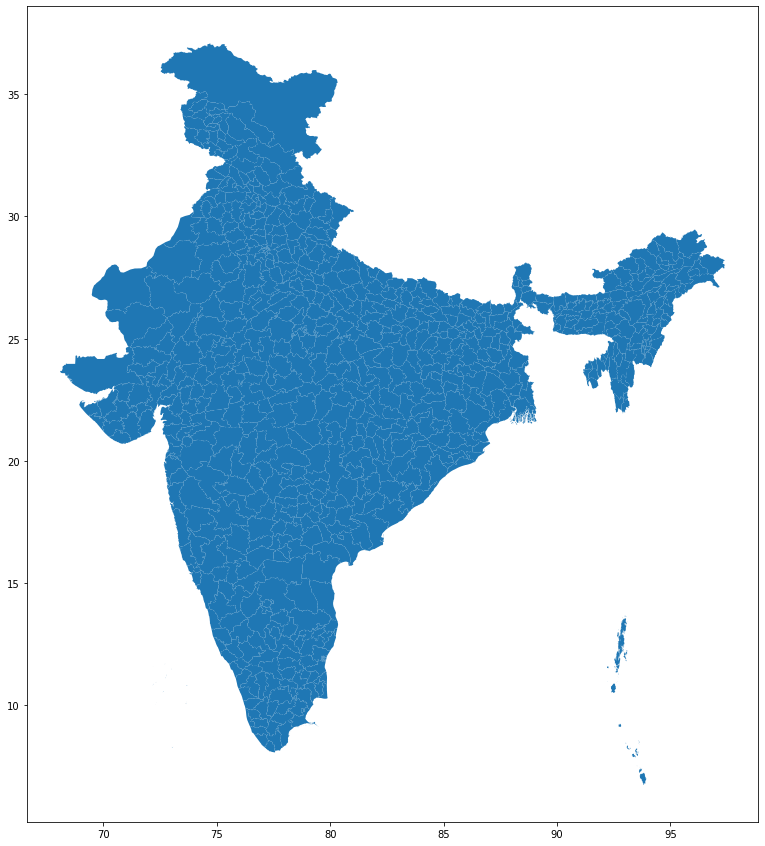

In [11]:
#ploting whole India Map
New_data.plot(figsize=(15,15))

<AxesSubplot:>

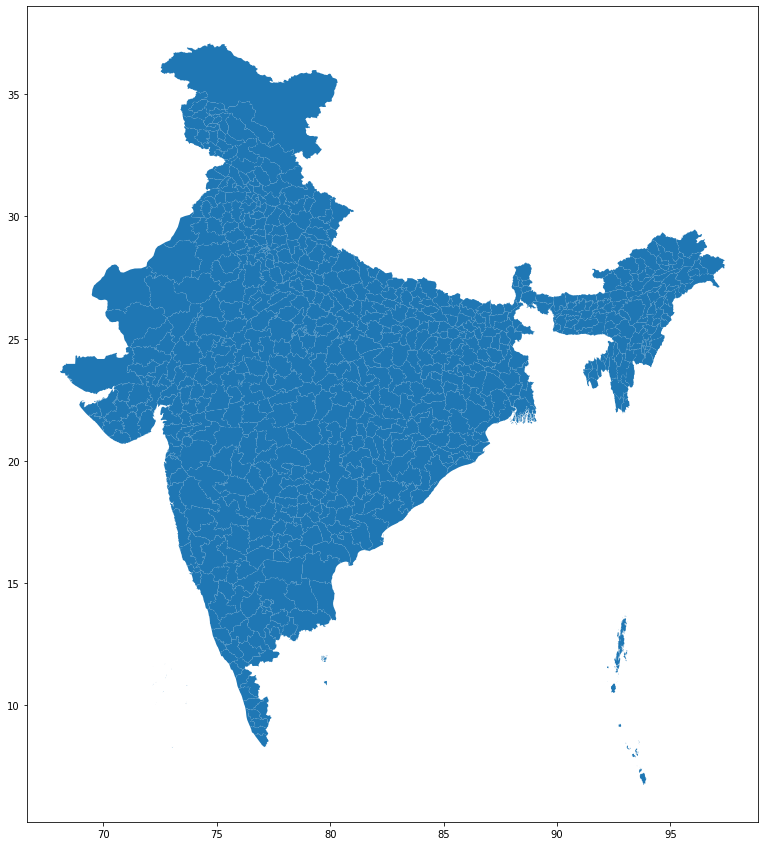

In [12]:
# Removing TAMIL NADU from GeoPandas GeoDataframe
data = New_data[India_data['State_Name'] != 'TAMIL NADU']
data.plot(figsize=(15,15))

**Visualizing a specific State**

We can visualize/plot a specific State by selecting it. In the below example, we are selecting “Rajasthan” from the “State_Name” column.

<AxesSubplot:>

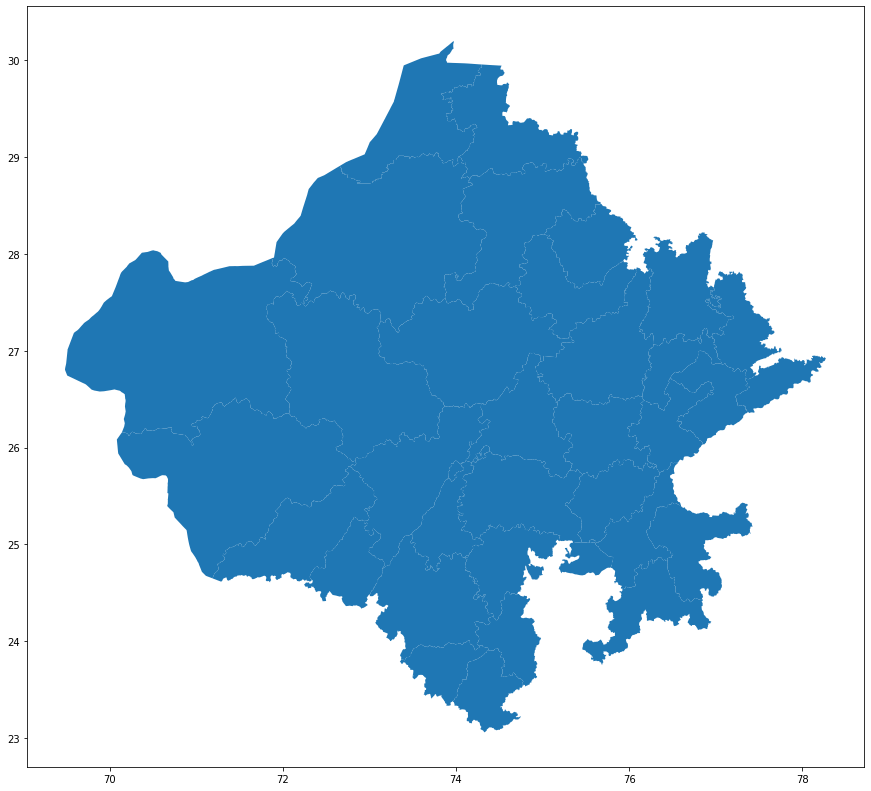

In [13]:
#get data about rajasthan
New_data[New_data.State_Name=="RAJASTHAN"].plot(figsize=(15,15))

**Using Color Maps (cmap)**

We can color each State in the Country using a head column and cmap. To find out head column type “India_data.head()” in console. We can choose different color maps(cmap) available in matplotlib. In the following code, we have colored countries using plot() arguments column and cmap. 

<AxesSubplot:>

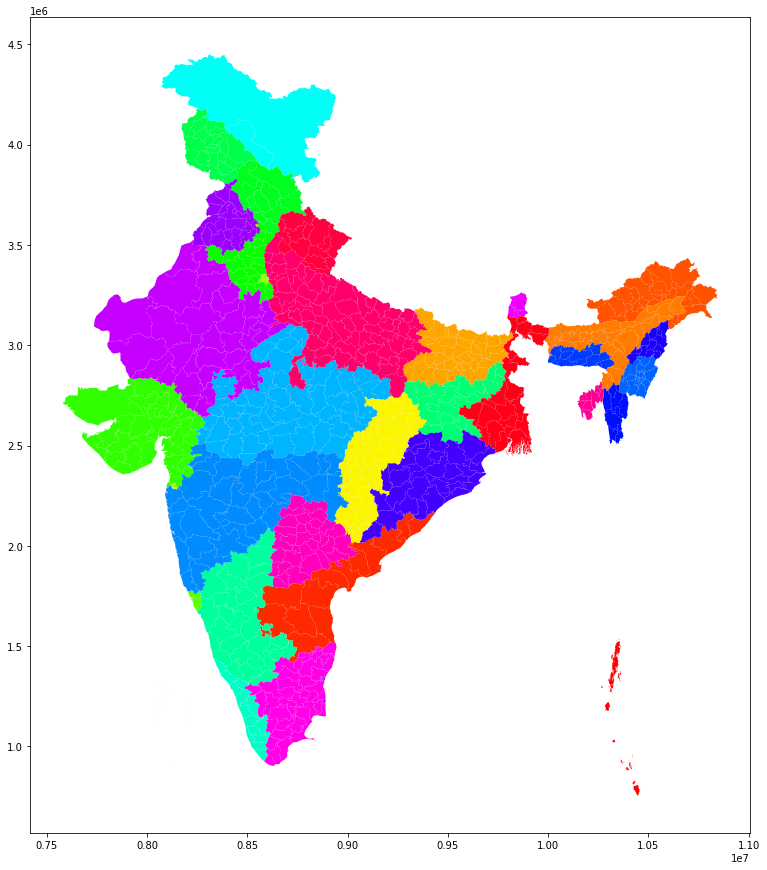

In [14]:
# Changing the projection
current_crs = New_data.crs
New_data.to_crs(epsg=3857, inplace=True)
  
New_data.plot(figsize=(15,15),column='State_Name', cmap='hsv')

In [15]:
# Re-calculate the areas in Sq. Km.
New_data['area'] = India_data.area/1000000

<AxesSubplot:>

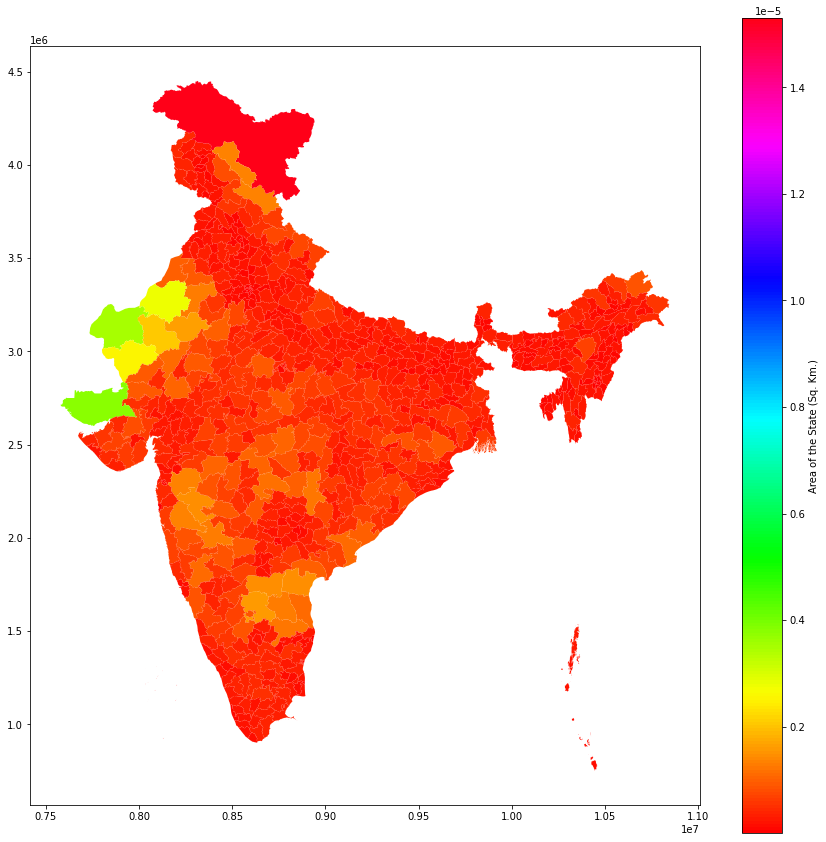

In [16]:
# Adding a legend
New_data.plot(column='area', cmap='hsv', legend=True,
                legend_kwds={'label': "Area of the State (Sq. Km.)"}, 
                figsize=(15,15))

<AxesSubplot:>

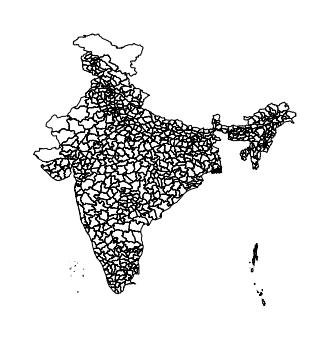

In [17]:
# # Reading the country shapefile
Ind = India_data
gplt.polyplot(Ind)

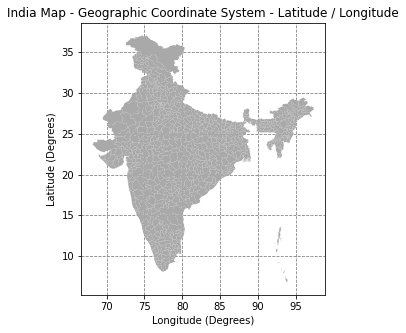

In [18]:
# Plot India_data data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
India_data.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="India Map - Geographic Coordinate System - Latitude / Longitude")

# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', 
              linestyle='dashed')
ax.xaxis.grid(color='gray', 
              linestyle='dashed')